In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
n_angles = 2
n_cells = 500
width = 500

sig_t = 0.1
sig_a = sig_t*0.01
sig_s = sig_t - sig_a
nu_sigf = sig_a*1.25

In [3]:
weights = np.zeros(n_angles)
angles = np.zeros(n_angles)

In [4]:
weights[0] = 0.5
weights[1] = 0.5

angles[0] = np.sqrt(1.0/3.0)
angles[1] = - angles[0]

In [5]:
def rhs(phi,k):
    b = np.zeros(n_cells)
    for i in range(n_cells):
        b[i] = phi[i]*sig_s + phi[i]*nu_sigf/k
    return b

In [6]:
def balance(phi):
    f = 0.0
    a = 0.0
    for i in range(n_cells):
        f = f + phi[i]*nu_sigf
        a = a + phi[i]*sig_a
    return f,a

In [7]:
def sweep(b):
    leakage = 0.0
    spacing = width/n_cells
    phi = np.zeros(n_cells)
    for i in range(n_angles):
        l = np.abs(spacing/angles[i])
        tau = sig_t*l
        mexp = (1-np.exp(-tau))
        if angles[i]>0:
            angular_flux_1 = 0.0   #vacuum BC
            for j in range(n_cells):    #sweep from left to right
                delta_psi = (angular_flux_1 - b[j]/sig_t)*mexp
                psi_avg = angular_flux_1*mexp/sig_t/l + b[j]*(1-mexp/tau)/sig_t
                phi[j] = phi[j] + 4*np.pi*weights[i]*psi_avg
                angular_flux_1 = angular_flux_1 - delta_psi
                if j == n_cells-1:
                    leakage = leakage + weights[i]*angles[i]*angular_flux_1
        else:
            angular_flux_2 = 0.0  #vacuum BC
            for j in range(n_cells-1,-1,-1):  #cells are accessed in reverse order, sweep from right to left
                delta_psi = (angular_flux_2 - b[j]/sig_t)*mexp
                psi_avg = angular_flux_2*mexp/sig_t/l + b[j]*(1-mexp/tau)/sig_t
                phi[j] = phi[j] + 4*np.pi*weights[i]*psi_avg
                angular_flux_2 = angular_flux_2 - delta_psi
                if j == 0:
                    leakage = leakage - weights[i]*angles[i]*angular_flux_2
    return phi, leakage

0.00020050000000000002
0 1.1436815586449507 0.0
0.00020018592315413557
1 1.1677916759153095 0.0
0.00020014079278998125
2 1.1802370210783912 0.0
0.00020011821859113987
3 1.1881420765998667 0.0
0.00020010412546549522
4 1.1937323808224098 0.0
0.0002000942717481431
5 1.1979549974696129 0.0
0.00020008688974567542
6 1.2012901661062625 0.0
0.0002000810958672069
7 1.204010831113083 0.0
0.0002000763932810213
8 1.206285140414337 0.0
0.00020007247848476462
9 1.208223103600394 0.0
0.00020006915427502641
10 1.209900133427151 0.0
0.0002000662862420872
11 1.211369892291355 0.0
0.00020006377921055223
12 1.2126717498695352 0.0
0.00020006156365089673
13 1.2138353351133075 0.0
0.00020005958743140944
14 1.214883432530854 0.0
0.000200057810595698
15 1.2158338906129218 0.0
0.00020005620193621972
16 1.2167009174990526 0.0
0.00020005473667689732
17 1.2174959836645078 0.0
0.00020005339486416651
18 1.2182284651817712 0.0
0.00020005216022400771
19 1.2189061113265687 0.0
0.0002000510193334572
20 1.219535390555233

0.00020002027615554074
438 1.2374559245712342 0.00010860205568875955
0.00020002027397530625
439 1.2374572467135867 0.0001075325429482938
0.0002000202718167755
440 1.2374585556973499 0.00010647344364236369
0.00020002026967973175
441 1.2374598516533746 0.0001054246585102774
0.00020002026756396163
442 1.2374611347112128 0.00010438608918588875
0.00020002026546925316
443 1.237462404999126 0.00010335763821793928
0.00020002026339539718
444 1.2374636626441038 0.00010233920904260683
0.0002000202613421863
445 1.2374649077718647 0.00010133070598811625
0.00020002025930941465
446 1.237466140506884 0.00010033203426515065
0.00020002025729687939
447 1.2374673609723952 9.934309994780688e-05
0.00020002025530437885
448 1.2374685692904075 9.836380998663193e-05
0.00020002025333171352
449 1.237469765581724 9.739407218086104e-05
0.00020002025137868702
450 1.2374709499659318 9.643379517945602e-05
0.00020002024944510324
451 1.2374721225614418 9.548288848311249e-05
0.00020002024753076875
452 1.2374732834854865 

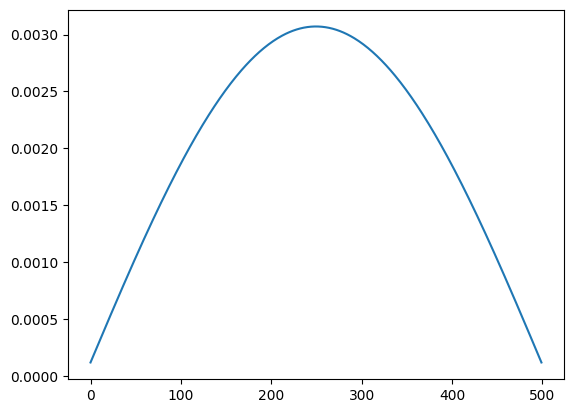

In [19]:
n_iter = 5000

flux_new = np.ones(n_cells)
flux_old = np.zeros(n_cells)
err = np.zeros(n_cells)

norm = sum(flux_new)
flux_new = flux_new / norm
k_new = 1.0

for i in range(n_iter):
    b_new = rhs(flux_new,k_new)
    print(np.mean(b_new))
    flux_new, leak = sweep(b_new)
    k_old = k_new
    f_new, a_new = balance(flux_new)
    k_new = f_new / (a_new + leak)
    norm = sum(flux_new)
    flux_new = flux_new / norm
    print(i,k_new, max(err))
    if np.abs(k_new-k_old)/k_new < 1e-5:
        for m in range(n_cells):
            err[m] = np.abs((flux_new[m]-flux_old[m])/flux_new[m])
        if max(err) < 1e-5:
            print(i)
            print(k_new)
            break
    flux_old = flux_new
plt.plot(flux_new)

In [16]:
nu_sigf/sig_a

1.25